# ERM untied exp

In [5]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

run_id = "20251101_121028"

## 1. experiment config

In [6]:
# --- Path to your local folder ---
config_path = f"../results/run_{run_id}/config.csv"

# --- Read the CSV file ---
config = pd.read_csv(config_path)
print(f"⚙️ Config loaded ({len(config)} rows) from {config_path}")

# --- Quick preview ---
display(config)

⚙️ Config loaded (4 rows) from ../results/run_20251101_121028/config.csv


,alpha,D,L,rho,rho_star,beta,lam,Delta_in,samples,T,learning_rate,norm_init,tol,N_test,base_dir
0,0.668333,100,2,1.0,0.5,1.0,0.00001,0.5,8,10000,0.1,1.0,0.000001,2000,/home/peucelle/tpiv-simulations/results/run_20...
1,0.778889,100,2,1.0,0.5,1.0,0.00001,0.5,8,10000,0.1,1.0,0.000001,2000,/home/peucelle/tpiv-simulations/results/run_20...
2,0.889444,100,2,1.0,0.5,1.0,0.00001,0.5,8,10000,0.1,1.0,0.000001,2000,/home/peucelle/tpiv-simulations/results/run_20...
3,1.000000,100,2,1.0,0.5,1.0,0.00001,0.5,8,10000,0.1,1.0,0.000001,2000,/home/peucelle/tpiv-simulations/results/run_20...


## 2. Metric as function of $\alpha$ for different $\rho$

✅ Summary loaded (20 rows) from ../results/run_20251101_121028/summary.csv


,alpha,alpha_idx,lam,rho,MSE_mean,MSE_std,label_err_mean,label_err_std,label_err_mean_noise,label_err_std_noise,train_data_mean,train_reg_mean,train_total_mean
0,0.668333,0,0.10000,1.0,11.226734,0.369530,0.002918,1.176149e-08,0.027957,4.575472e-08,0.093047,0.012637,0.105684
1,0.668333,0,0.01000,1.0,25.760736,0.558991,0.000896,7.487408e-09,0.027031,4.687203e-08,0.082244,0.003396,0.085640
2,0.668333,0,0.00100,1.0,27.739355,0.713864,0.001011,7.554900e-09,0.027019,6.669598e-08,0.082693,0.000364,0.083057
3,0.668333,0,0.00010,1.0,28.326839,0.774827,0.001068,8.123536e-09,0.027108,8.354051e-08,0.082469,0.000037,0.082506
4,0.668333,0,0.00001,1.0,28.391870,0.728154,0.001079,8.138080e-09,0.027404,6.704342e-08,0.082212,0.000004,0.082216


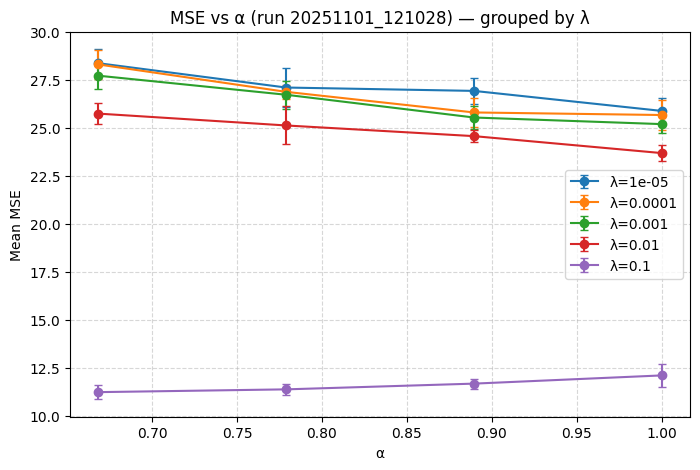

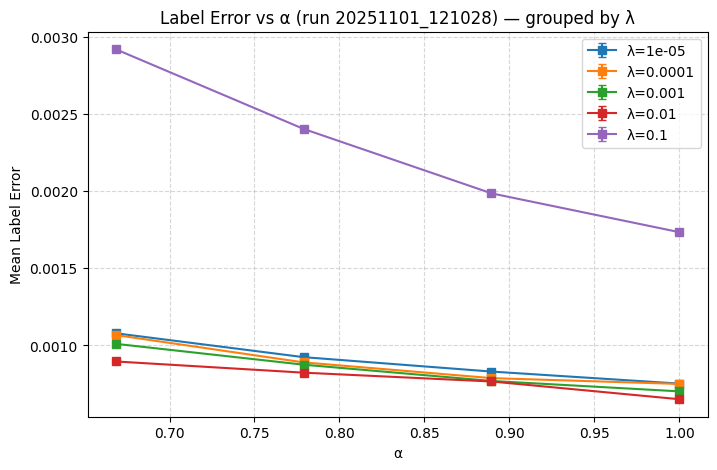

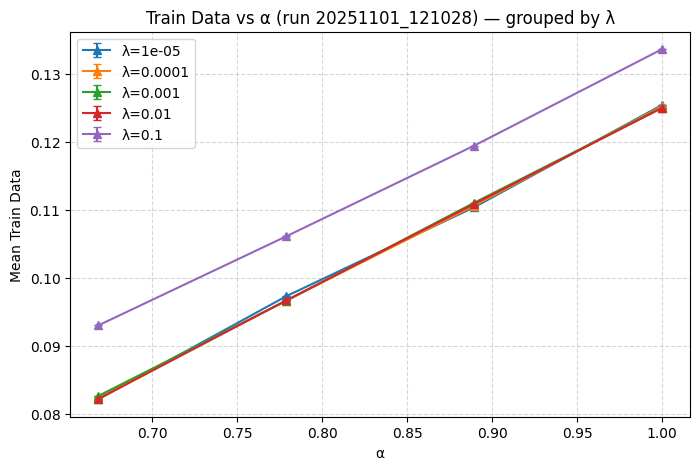

In [7]:
# --- Path to your local folder ---
base_path = f"../results/run_{run_id}/summary.csv"

# --- Read the CSV file ---
df = pd.read_csv(base_path)
print(f"✅ Summary loaded ({len(df)} rows) from {base_path}")

# --- Quick preview ---
display(df.head())

# --- Plot MSE vs alpha with error bars (grouped by lambda) ---
plt.figure(figsize=(8, 5))
for lam in sorted(df["lam"].unique()):
    subset = df[df["lam"] == lam].sort_values("alpha")  # Sort by alpha
    plt.errorbar(subset["alpha"], subset["MSE_mean"], yerr=subset.get("MSE_std", 0),
                 marker='o', capsize=3, label=f"λ={lam}")
plt.xlabel("α")
plt.ylabel("Mean MSE")
plt.title(f"MSE vs α (run {run_id}) — grouped by λ")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# --- Plot Label Error vs alpha with error bars (grouped by lambda) ---
plt.figure(figsize=(8, 5))
for lam in sorted(df["lam"].unique()):
    subset = df[df["lam"] == lam].sort_values("alpha")
    plt.errorbar(subset["alpha"], subset["label_err_mean"], yerr=subset.get("label_err_std", 0),
                 marker='s', capsize=3, label=f"λ={lam}")
plt.xlabel("α")
plt.ylabel("Mean Label Error")
plt.title(f"Label Error vs α (run {run_id}) — grouped by λ")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# --- Plot Train Data vs alpha with error bars (grouped by lambda) ---
plt.figure(figsize=(8, 5))
for lam in sorted(df["lam"].unique()):
    subset = df[df["lam"] == lam].sort_values("alpha")
    plt.errorbar(subset["alpha"], subset["train_data_mean"], yerr=subset.get("train_data_std", 0),
                 marker='^', capsize=3, label=f"λ={lam}")
plt.xlabel("α")
plt.ylabel("Mean Train Data")
plt.title(f"Train Data vs α (run {run_id}) — grouped by λ")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

## 3. Eigenvalue distributions per $\rho$

Found 10 S_runs files.

Processing ../results/run_20251101_121028/S_runs_0.pkl, containing 5 lambda indices...


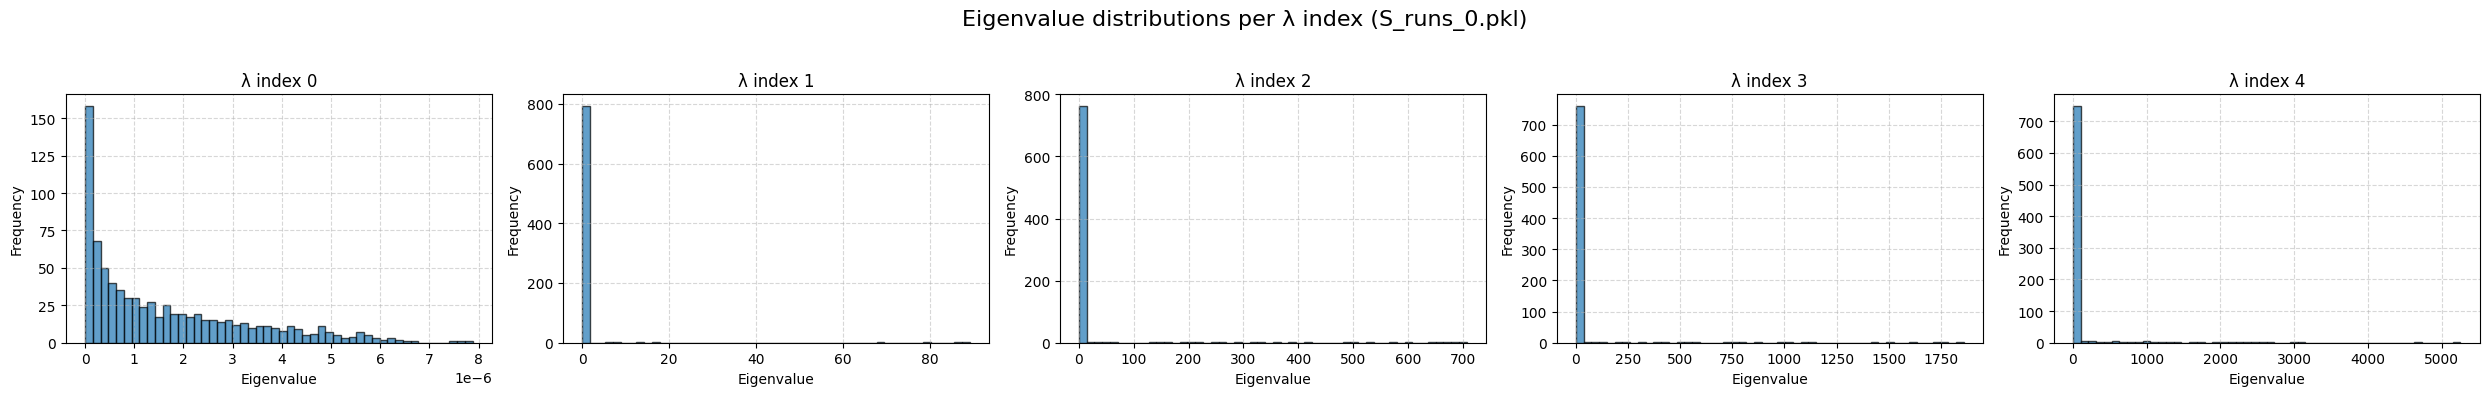


Processing ../results/run_20251101_121028/S_runs_1.pkl, containing 5 lambda indices...


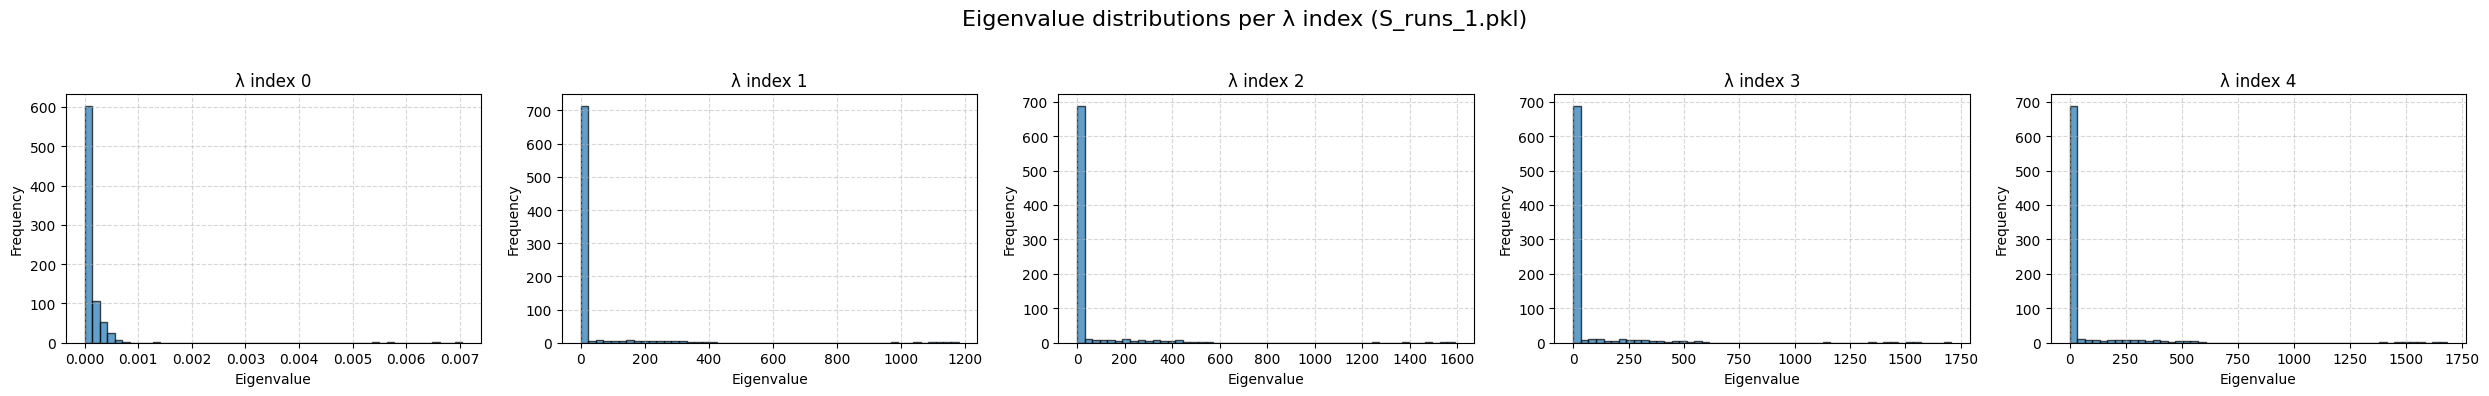


Processing ../results/run_20251101_121028/S_runs_2.pkl, containing 5 lambda indices...


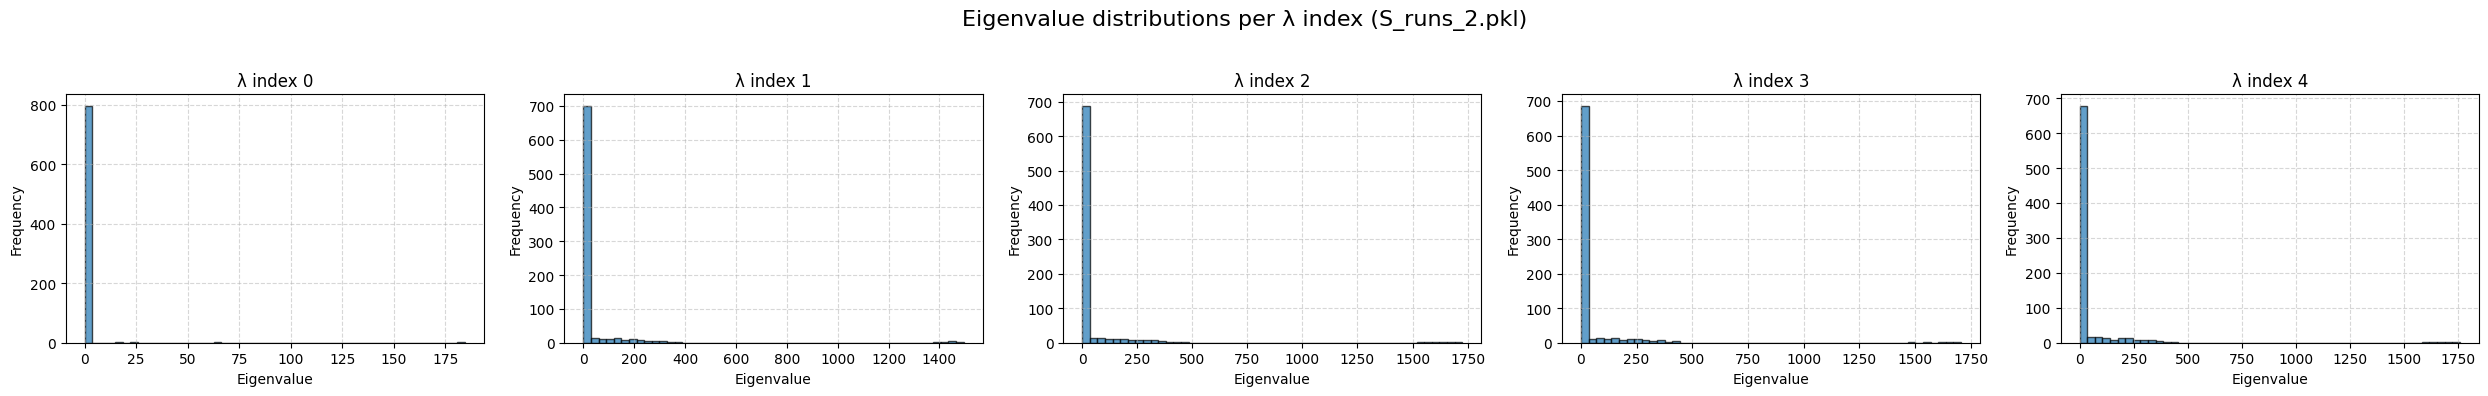


Processing ../results/run_20251101_121028/S_runs_3.pkl, containing 5 lambda indices...


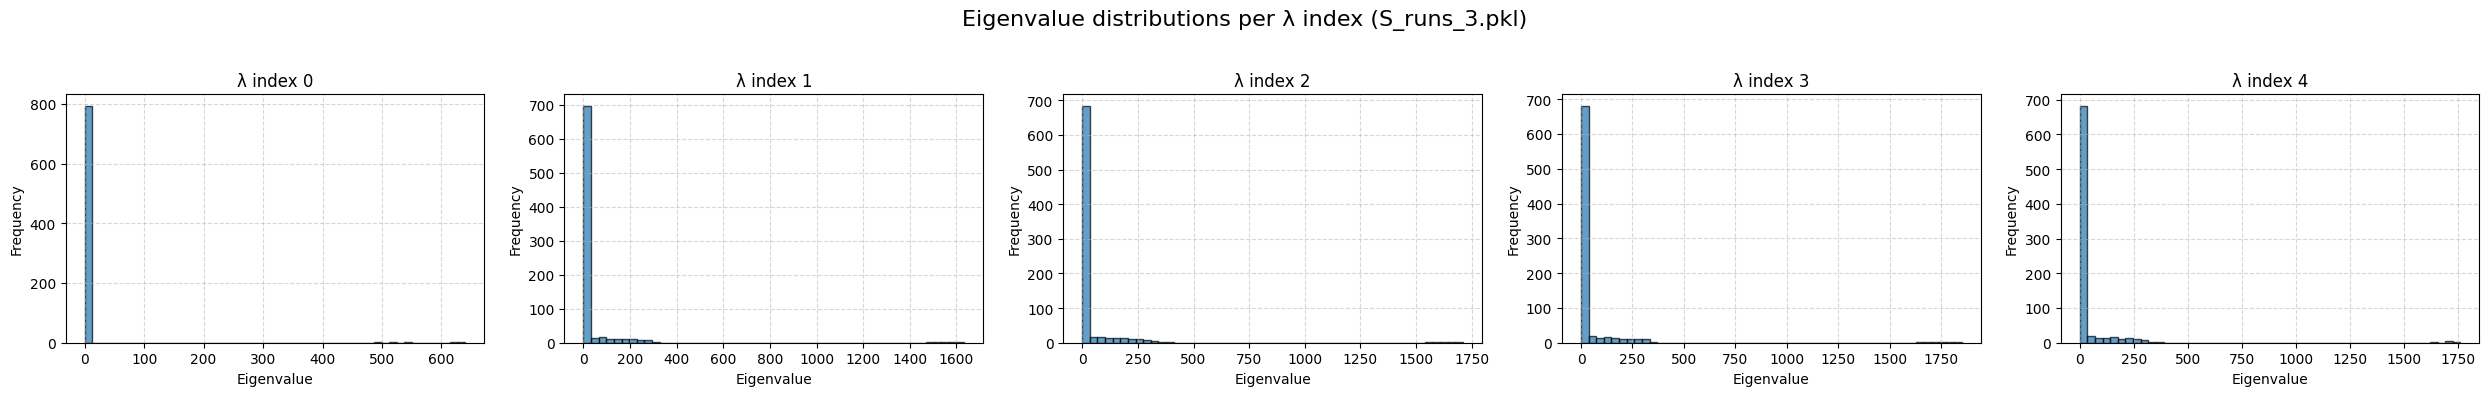


Processing ../results/run_20251101_121028/S_runs_4.pkl, containing 5 lambda indices...


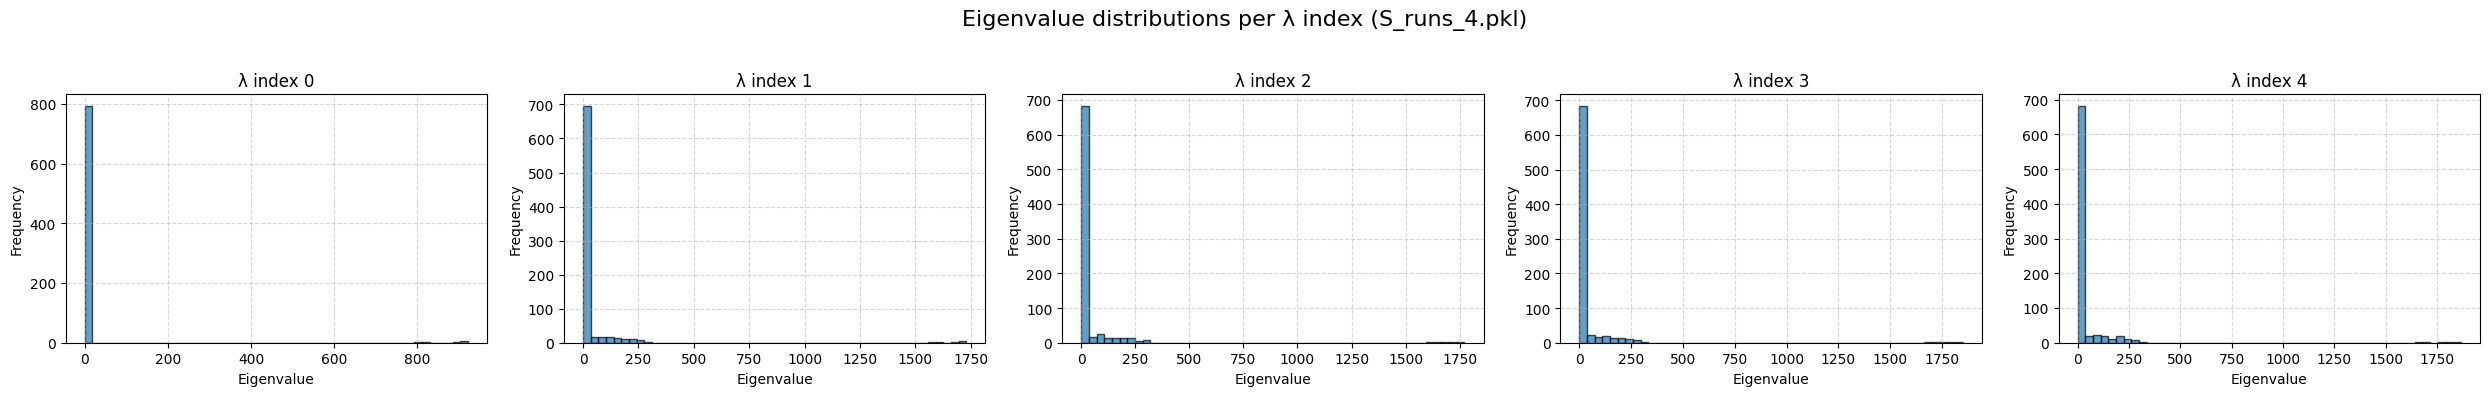


Processing ../results/run_20251101_121028/S_runs_5.pkl, containing 5 lambda indices...


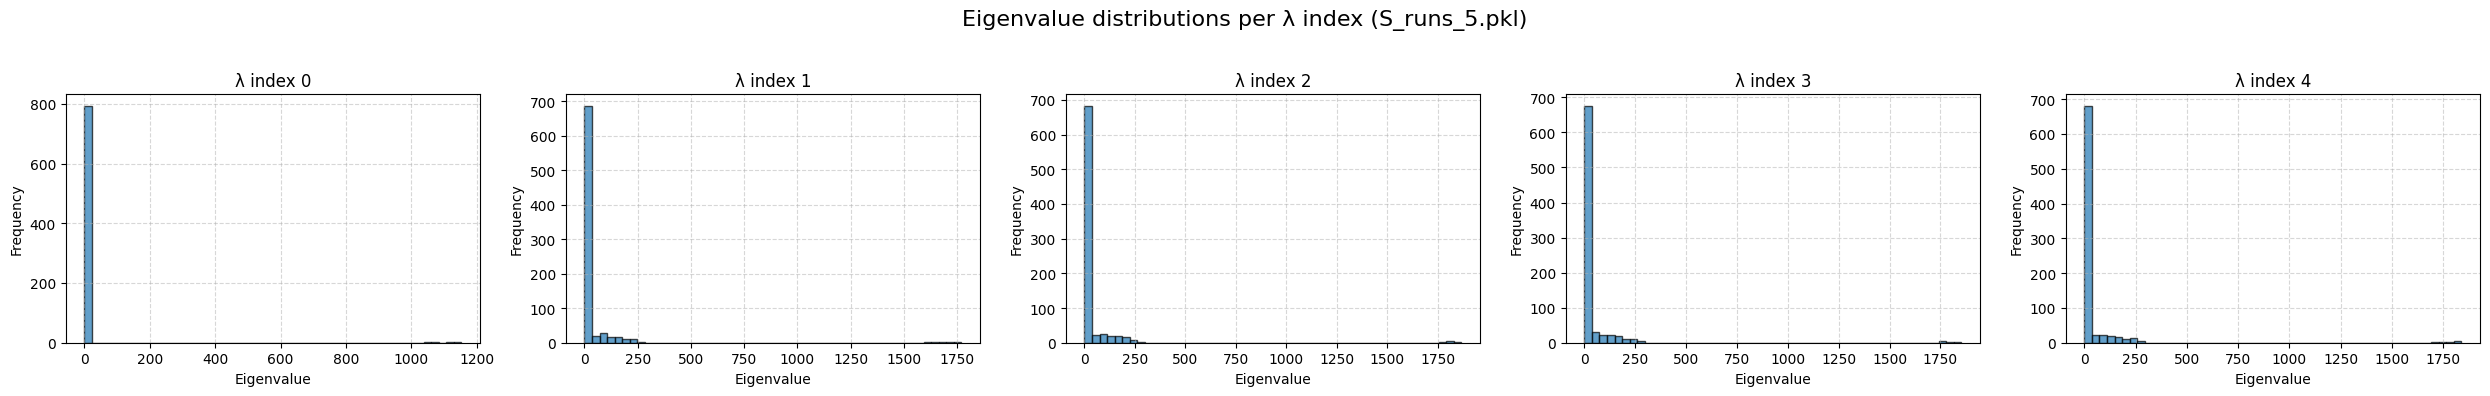


Processing ../results/run_20251101_121028/S_runs_6.pkl, containing 5 lambda indices...


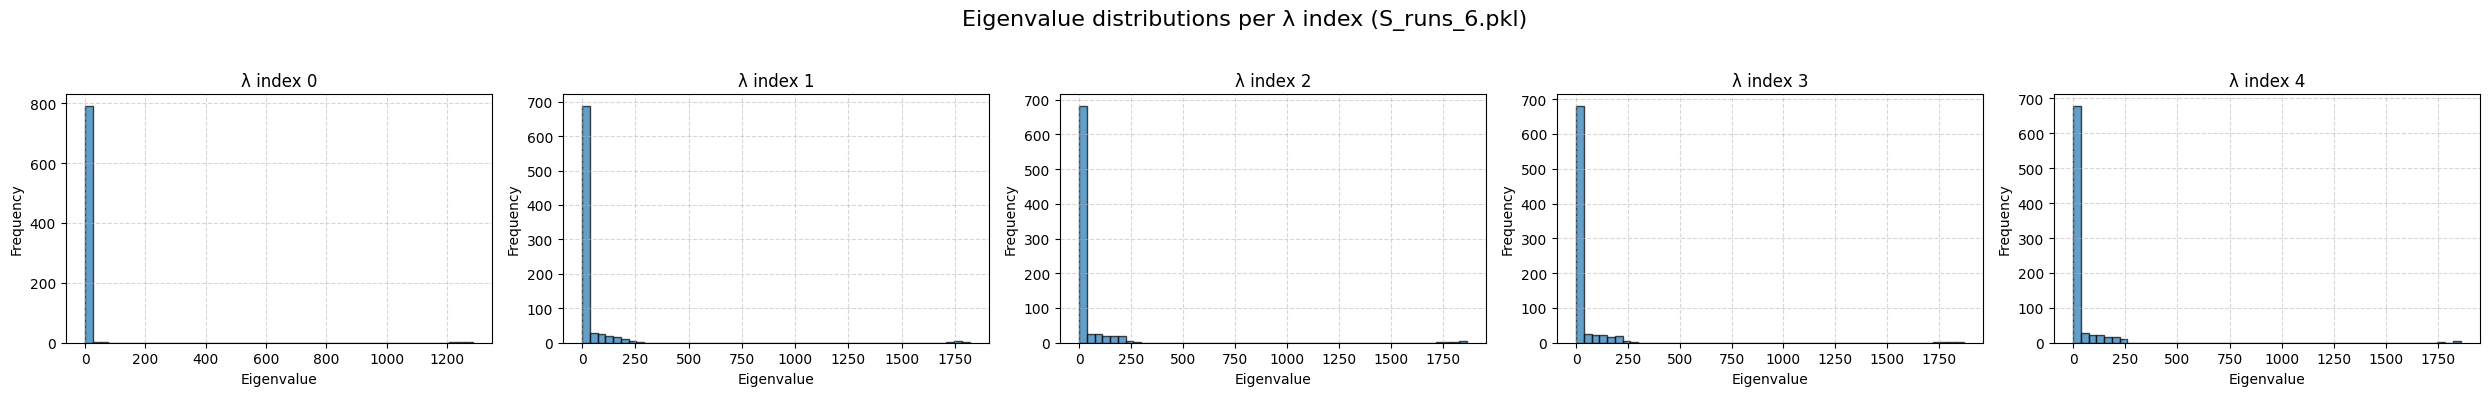


Processing ../results/run_20251101_121028/S_runs_7.pkl, containing 5 lambda indices...


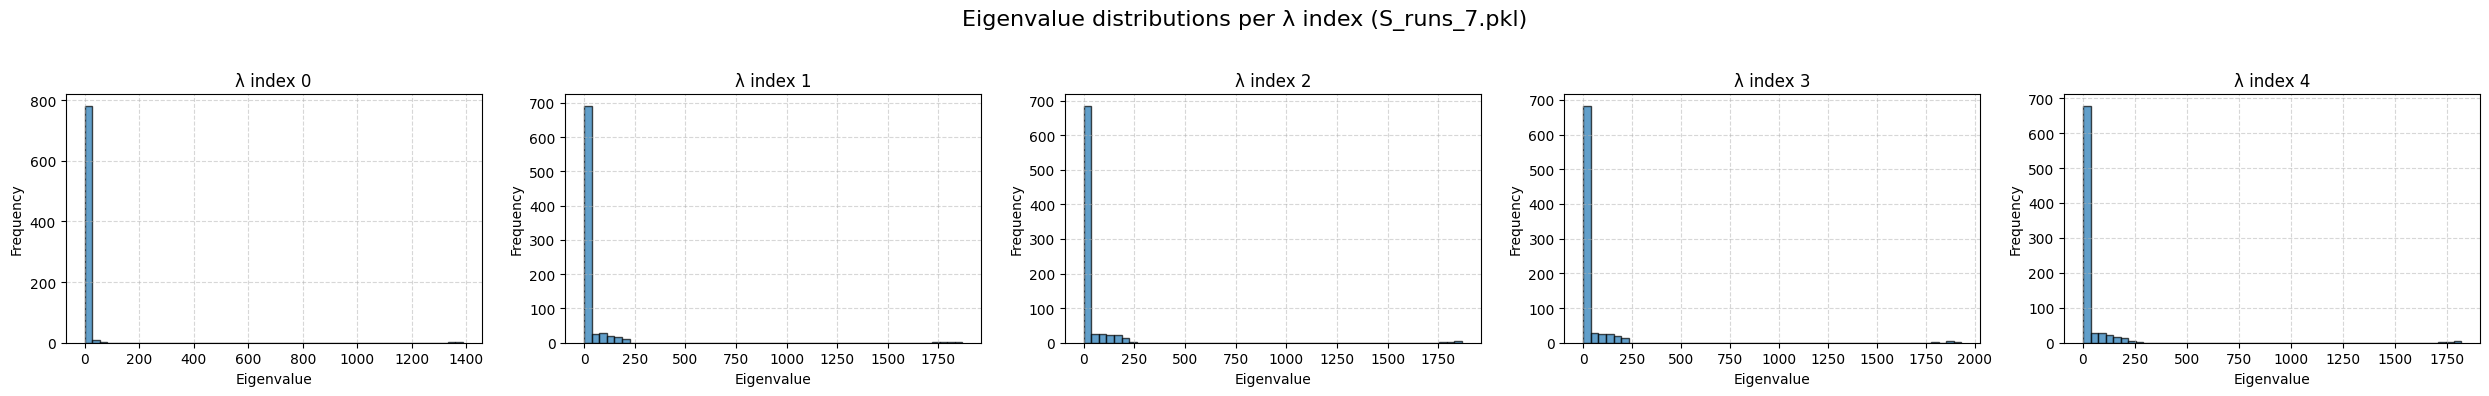


Processing ../results/run_20251101_121028/S_runs_8.pkl, containing 5 lambda indices...


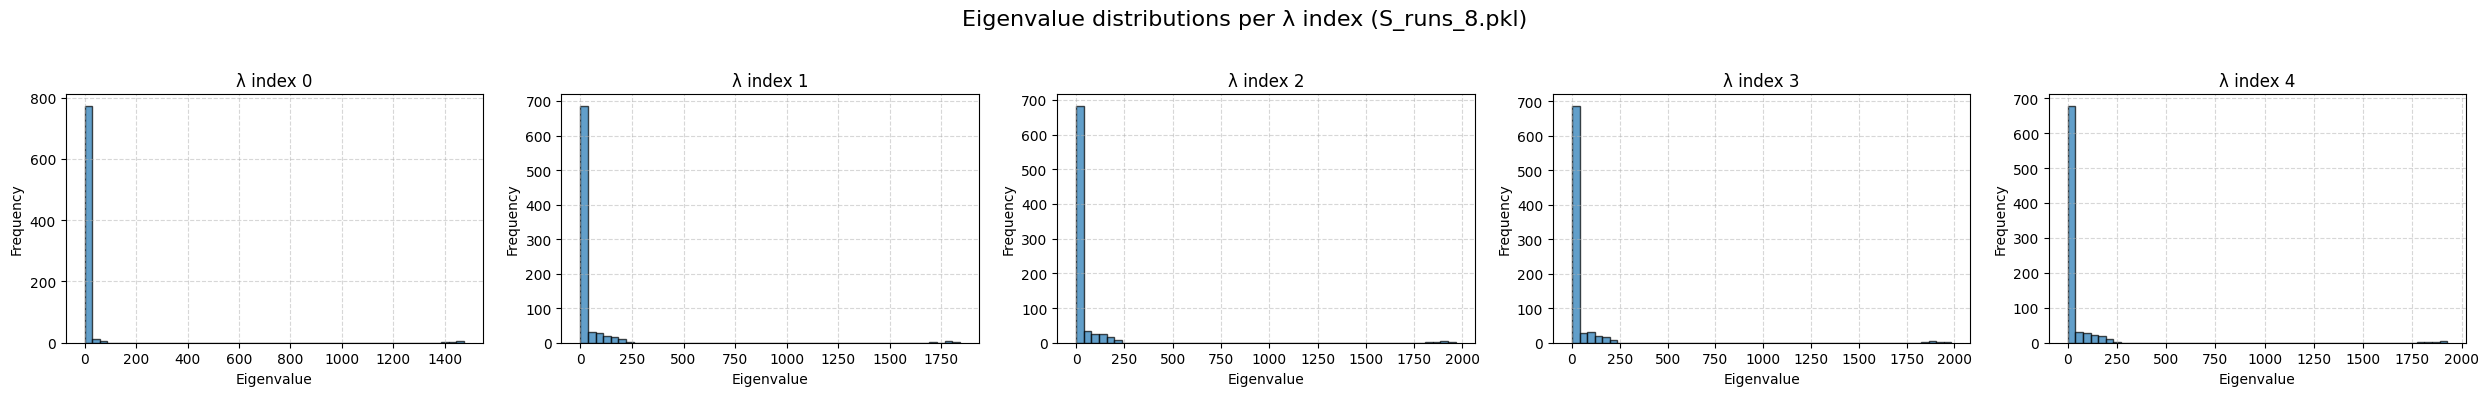


Processing ../results/run_20251101_121028/S_runs_9.pkl, containing 5 lambda indices...


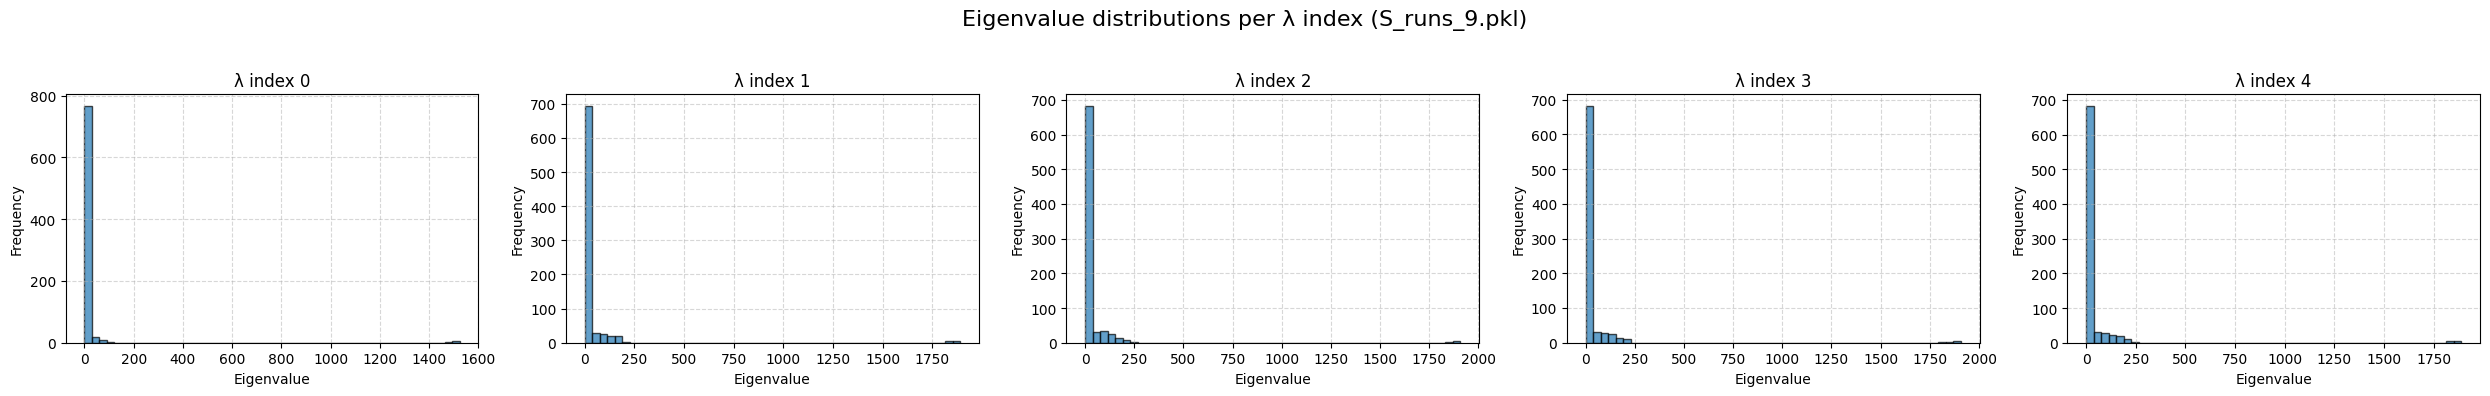

In [9]:
# --- Path to your results directory ---
run_dir = f"../results/run_{run_id}"  # replace with your run_id
pkl_files = sorted(glob.glob(os.path.join(run_dir, "S_runs_*.pkl")))

print(f"Found {len(pkl_files)} S_runs files.")

# --- Loop over each W_runs pickle file ---
for pkl_file in pkl_files:
    with open(pkl_file, "rb") as f:
        W_runs_all = pickle.load(f)  # List of W lists per λ index (i)

    print(f"\nProcessing {pkl_file}, containing {len(W_runs_all)} lambda indices...")

    num_lambda = len(W_runs_all)
    fig, axes = plt.subplots(1, num_lambda, figsize=(5*num_lambda, 4), squeeze=False)

    for i, W_list in enumerate(W_runs_all):
        all_eigvals_i = []
        for W in W_list:
            eigvals = np.linalg.eigvalsh(W @ W.T)
            all_eigvals_i.extend(eigvals)

        all_eigvals_i = np.array(all_eigvals_i)

        ax = axes[0, i]
        ax.hist(all_eigvals_i, bins=50, alpha=0.7, edgecolor='black')
        ax.set_xlabel("Eigenvalue")
        ax.set_ylabel("Frequency")
        ax.set_title(f"λ index {i}")
        ax.grid(True, linestyle="--", alpha=0.5)

    fig.suptitle(f"Eigenvalue distributions per λ index ({os.path.basename(pkl_file)})", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()